# Part 2 - Words As Features
In this part we will use a count vectorizer to determine our features. We will then use those features to train several models using different approaches.

First we will re-import the information, as seen in part 1.

In [1]:
import numpy as np
import json

with open('goemotions.json') as f:
	dataset = np.array(json.load(f))
	
posts = dataset[:, 0]
emotions = dataset[:, 1]
sentiments = dataset[:, 2]

## 2.1 - Extraction
We will extract the features (vocabulary in each post).

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizedPosts = vectorizer.fit_transform(posts)

We can now find the size of our vocabulary through 2 approaches.

In [3]:
# 1. Vectorizer features.
print(len(vectorizer.get_feature_names_out()))

# 2. Vectorized post shape (the column number).
print(vectorizedPosts.shape)

30449
(171820, 30449)


We will now also convert our classes into numerical values so we can use them. For this, we will use a LabelEncoder

In [3]:
from sklearn.preprocessing import LabelEncoder

# Emotions.
emotionsLabelEncoder = LabelEncoder()
encodedEmotions = emotionsLabelEncoder.fit_transform(emotions)

# Sentiments.
sentimentsLabelEncoder = LabelEncoder()
encodedSentiments = sentimentsLabelEncoder.fit_transform(sentiments)

We can test to see if we have correctly encoded our targets.

In [5]:
print(f"Number of emotions: {len(emotionsLabelEncoder.classes_)}")
print(f"Number of sentiments: {len(sentimentsLabelEncoder.classes_)}")

Number of emotions: 28
Number of sentiments: 4


## 2.2 - Splitting For Training And Testing
We will use built in functions to split our data for training and testing (for both sentiments and emotions).

In [4]:
from sklearn.model_selection import train_test_split

postsForEmotions_train, postsForEmotions_test, emotions_train, emotions_test =  train_test_split(vectorizedPosts, encodedEmotions, test_size=0.20)
postsForSentiments_train, postsForSentiments_test, sentiments_train, sentiments_test =  train_test_split(vectorizedPosts, encodedSentiments, test_size=0.20)

## 2.3 - Training And Testing
In this section we will train and test various models with different hyperparameters.

### 2.3.1 - Base Multinomial Naive Bayes
We simply use `MultinomialNB` to train our model.

In [5]:
from sklearn.naive_bayes import MultinomialNB

baseMNBClassifier_emotions = MultinomialNB()
baseMNBClassifier_sentiments = MultinomialNB()

We now fit, predict, and test our emotions.

In [6]:
baseMNBClassifier_emotions.fit(postsForEmotions_train, emotions_train)
baseMNB_emotions_results = baseMNBClassifier_emotions.predict(postsForEmotions_test)
baseMNBClassifier_emotions.score(postsForEmotions_test, emotions_test)

0.38499592596903737

We now repeat the process for the sentiments.

In [7]:
baseMNBClassifier_sentiments.fit(postsForSentiments_train, sentiments_train)
baseMNB_sentiments_results = baseMNBClassifier_sentiments.predict(postsForSentiments_test)
baseMNBClassifier_sentiments.score(postsForSentiments_test, sentiments_test)

0.5476661622628332

We create a confusion matrix for use in the analysis.

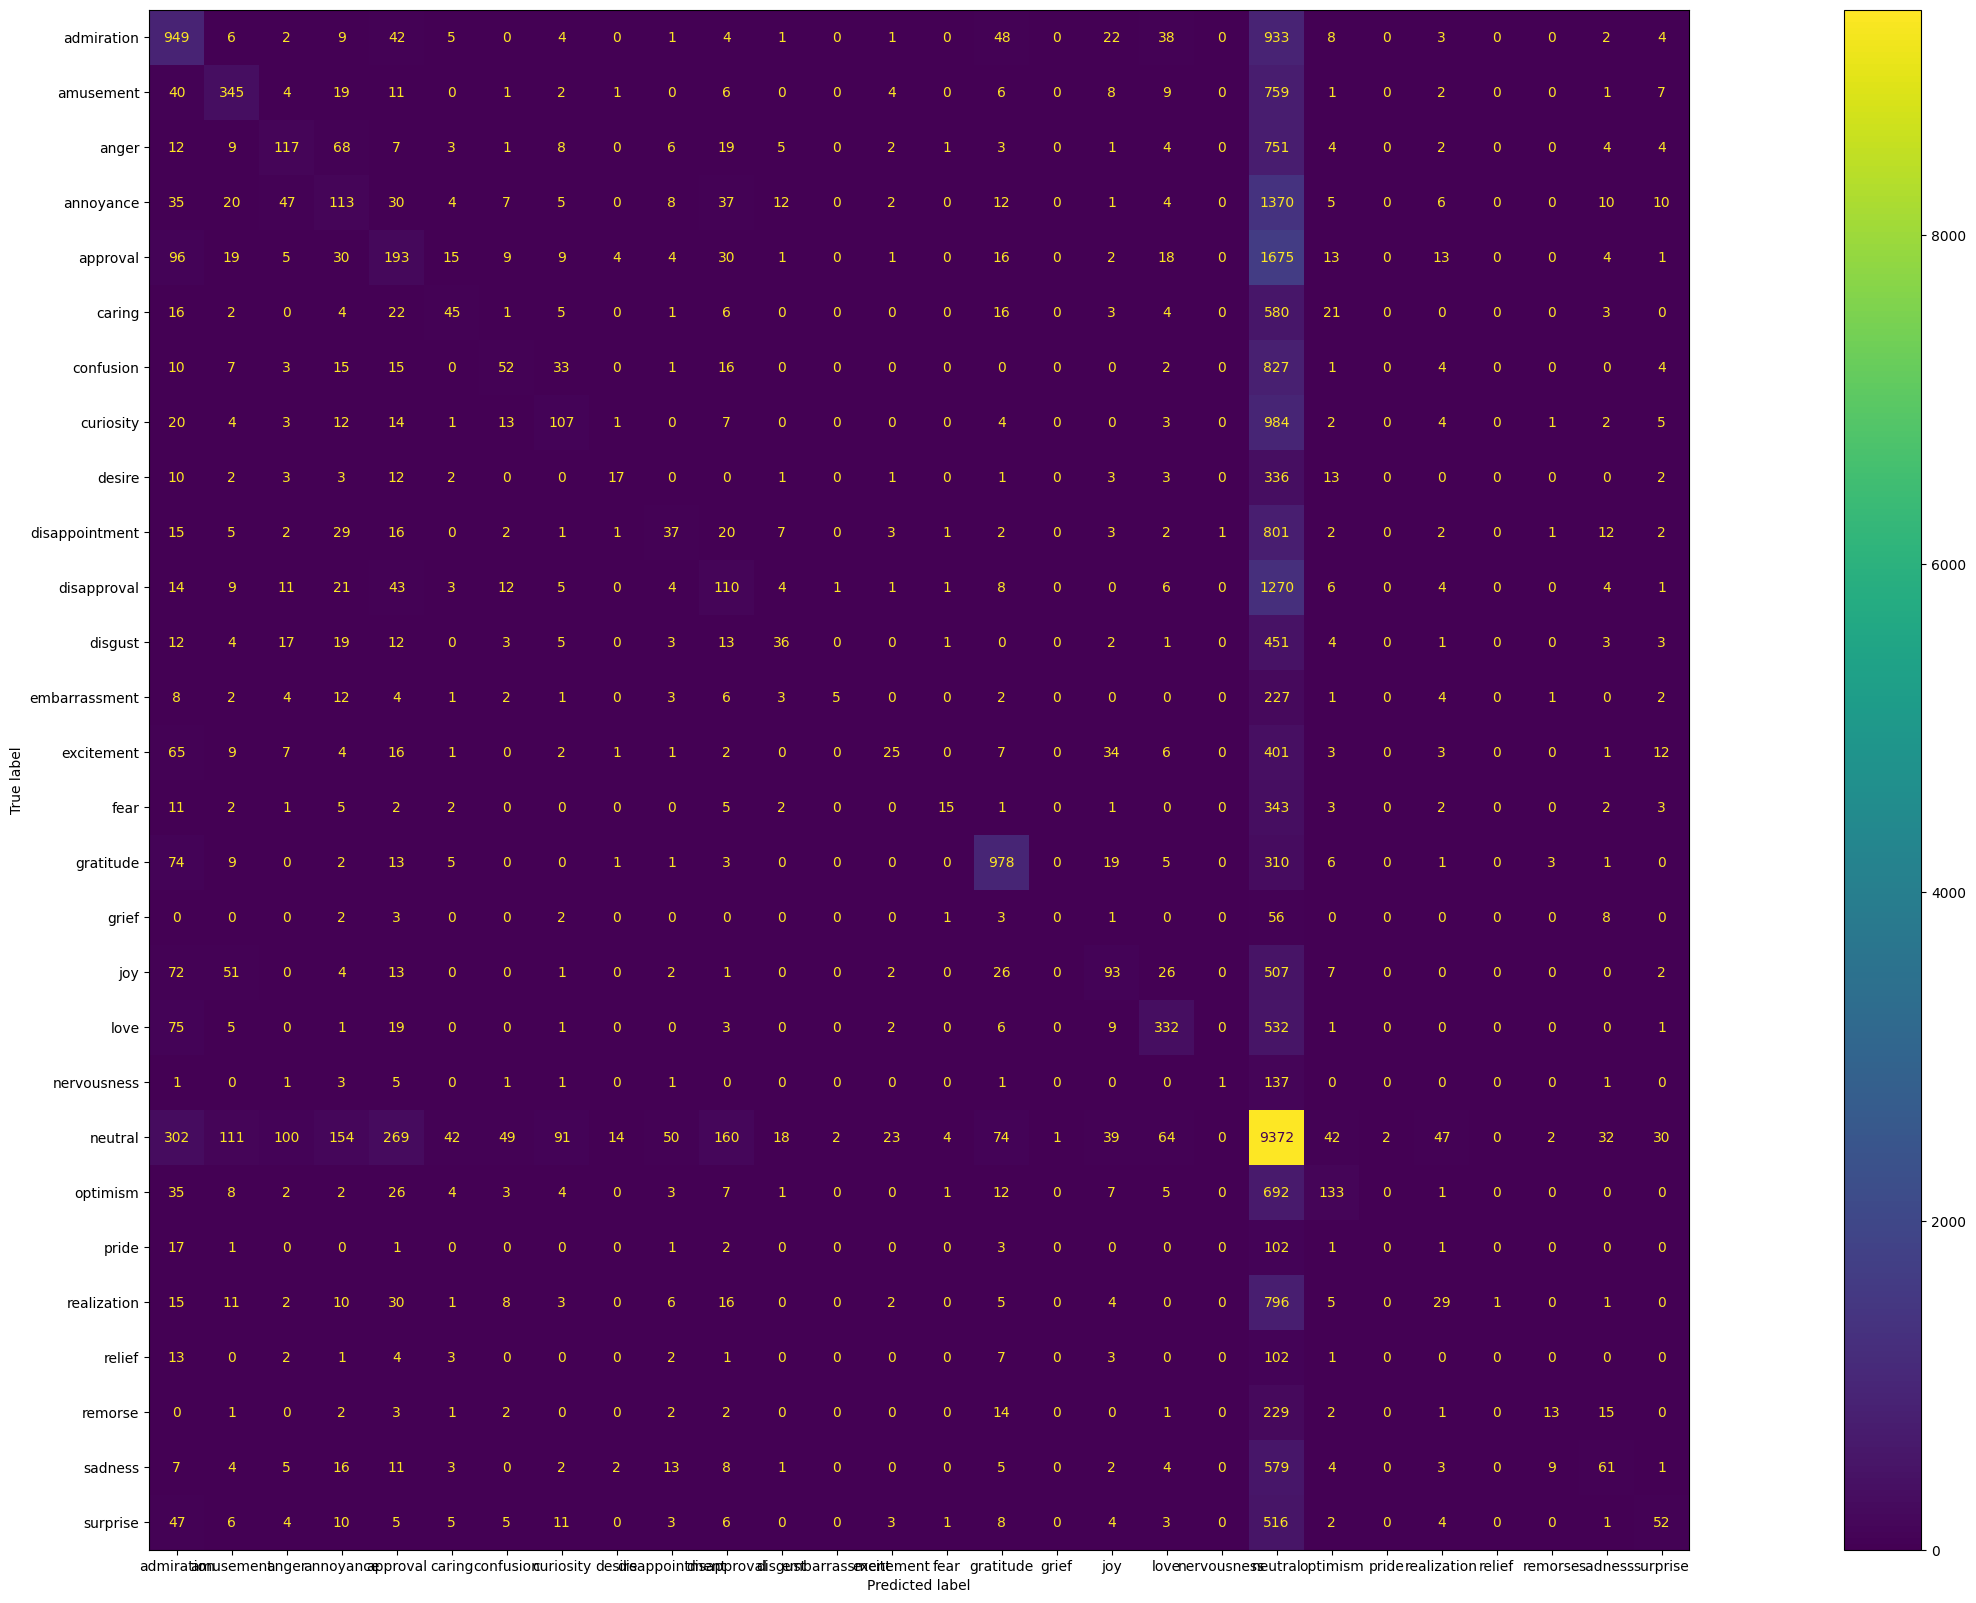

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = [
		"admiration",
		"amusement",
		"anger",
		"annoyance",
		"approval",
		"caring",
		"confusion",
		"curiosity",
		"desire",
		"disappointment",
		"disapproval",
		"disgust",
		"embarrassment",
		"excitement",
		"fear",
		"gratitude",
		"grief",
		"joy",
		"love",
		"nervousness",
		"neutral",
		"optimism",
		"pride",
		"realization",
		"relief",
		"remorse",
		"sadness",
		"surprise"
]

cm = confusion_matrix(emotions_test, baseMNB_emotions_results)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(40,20))
disp.plot(ax=ax)
plt.show()


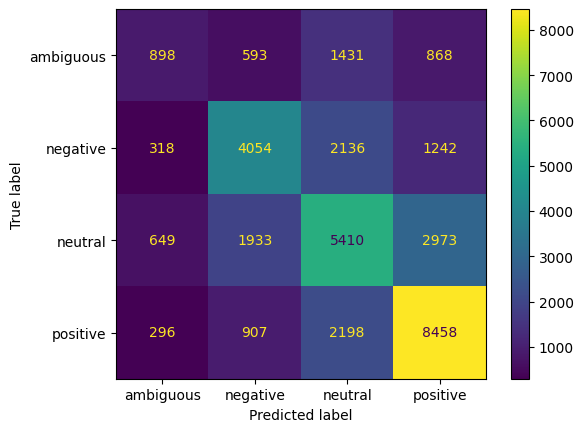

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = [
	"ambiguous",
	"negative",
	"neutral",
	"positive"
]

cm = confusion_matrix(sentiments_test, baseMNB_sentiments_results)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()


### 2.3.2 - Base Decision Tree
We will be using the `DecisionTreeClassifier` with default hyperparameters.

In [10]:
from sklearn.tree import DecisionTreeClassifier

baseDTClassifier_emotions = DecisionTreeClassifier()
baseDTClassifier_sentiments = DecisionTreeClassifier()

Fitting, predicting, and testing the emotions.

In [11]:
baseDTClassifier_emotions.fit(postsForEmotions_train, emotions_train)
baseDT_emotions_results = baseDTClassifier_emotions.predict(postsForEmotions_test)
baseDTClassifier_emotions.score(postsForEmotions_test, emotions_test)

0.35572110348038644

We now repeat the process for sentiments.

In [12]:
baseDTClassifier_sentiments.fit(postsForSentiments_train, sentiments_train)
baseDT_sentiments_results = baseDTClassifier_sentiments.predict(postsForSentiments_test)
baseDTClassifier_sentiments.score(postsForSentiments_test, sentiments_test)

0.5463566523105575

### 2.3.3 - Base Multi-Layered Perceptron
We will use the MLPClassifier by SciKit. The only change is that we will use the `early_stopping` hyper parameter. Without setting this to true, the model does not converge (I have waited over 35 minutes without success). This is partially due to my hardware restrictions.

In [13]:
from sklearn.neural_network import MLPClassifier

baseMLPClassifier_emotions = MLPClassifier(early_stopping=True)
baseMLPClassifier_sentiments = MLPClassifier(early_stopping=True)

We now train, predict, and test our emotions.

In [14]:
baseMLPClassifier_emotions.fit(postsForEmotions_train, emotions_train)
baseMLP_emotions_results = baseMLPClassifier_emotions.predict(postsForEmotions_test)
baseMLPClassifier_emotions.score(postsForEmotions_test, emotions_test)

0.43475730415551156

We repeat the process for the sentiments.

In [15]:
baseMLPClassifier_sentiments.fit(postsForSentiments_train, sentiments_train)
baseMLP_sentiments_results = baseMLPClassifier_sentiments.predict(postsForSentiments_test)
baseMLPClassifier_sentiments.score(postsForSentiments_test, sentiments_test)

0.5744674659527412

### 2.3.4 - Top Multinomial Bayes Classifier
We use `GridSearchCV` to find the optimal hyperparameters for our Multinomial Bayes Classifier.

In [16]:
from sklearn.model_selection import GridSearchCV

topMNBParameters = {
    'alpha': (1,0.5,0.25,0)
}

We now train, predict, and test the emotions using the top classifier.

In [17]:
topMNBsearch_emotions = GridSearchCV(baseMNBClassifier_emotions, topMNBParameters)
topMNBsearch_emotions.fit(postsForEmotions_train, emotions_train)
topMNB_emotions_results = topMNBsearch_emotions.predict(postsForEmotions_test)
topMNBsearch_emotions.score(postsForEmotions_test, emotions_test)

/home/sobhan/.local/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/home/sobhan/.local/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/home/sobhan/.local/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/home/sobhan/.local/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/home/sobhan/.local/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


0.39104877197066695

We then repeat the process for the sentiments.

In [18]:
topMNBsearch_sentiments = GridSearchCV(baseMNBClassifier_sentiments, topMNBParameters)
topMNBsearch_sentiments.fit(postsForSentiments_train, sentiments_train)
topMNB_sentiments_results = topMNBsearch_sentiments.predict(postsForSentiments_test)
topMNBsearch_sentiments.score(postsForSentiments_test, sentiments_test)

/home/sobhan/.local/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/home/sobhan/.local/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/home/sobhan/.local/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/home/sobhan/.local/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/home/sobhan/.local/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


0.5456000465603539

### 2.3.5 - Top Decision Tree
We repeat a similar process to the previous part, but for our Decision Tree instead.

To help decide our max depth options, we will first look at the current max-depth to get an idea.

In [20]:
print(f"Emotions Max Depth: {baseDTClassifier_emotions.tree_.max_depth}")
print(f"Sentiments Max Depth: {baseDTClassifier_sentiments.tree_.max_depth}")

Emotions Max Depth: 1575
Sentiments Max Depth: 1378


In [25]:
from sklearn.model_selection import GridSearchCV

topDTParameters = {
    'criterion': ('gini', 'entropy'),
    'max_depth': (400,800),
    'min_samples_split': (4,6,8)
}

We will now train, predict, and test the emotions.

In [26]:
topDTsearch_emotions = GridSearchCV(baseDTClassifier_emotions, topDTParameters)
topDTsearch_emotions.fit(postsForEmotions_train, emotions_train)
topDT_emotions_results = topDTsearch_emotions.predict(postsForEmotions_test)
topDTsearch_emotions.score(postsForEmotions_test, emotions_test)

0.37175532534047256

We repeat the process for the sentiments.

In [27]:
topDTsearch_sentiments = GridSearchCV(baseDTClassifier_sentiments, topDTParameters)
topDTsearch_sentiments.fit(postsForSentiments_train, sentiments_train)
topDT_sentiments_results = topDTsearch_sentiments.predict(postsForSentiments_test)
topDTsearch_sentiments.score(postsForSentiments_test, sentiments_test)

0.5489174717727855

### 2.3.6 -Top Multi-Layered Perceptron
We can repeat the process for our multi-layered perceptron.

In [36]:
from sklearn.model_selection import GridSearchCV

topMLPParameters = {
    'activation': ('logistic', 'tanh', 'relu', 'identity'),
    'hidden_layer_sizes': ((30,50), (10,10,10)),
    'solver': ('sgd', 'adam'),
	'early_stopping': [True]
}

We train, predict, and test the emotions.

In [29]:
topMLPsearch_emotions = GridSearchCV(baseMLPClassifier_emotions, topMLPParameters)
topMLPsearch_emotions.fit(postsForEmotions_train, emotions_train)
topMLP_emotions_results = topMLPsearch_emotions.predict(postsForEmotions_test)
topMLPsearch_emotions.score(postsForEmotions_test, emotions_test)


0.4315562798277267

We then repeat the process for the sentiments.

In [37]:
topMLPsearch_sentiments = GridSearchCV(baseMLPClassifier_sentiments, topMLPParameters)
topMLPsearch_sentiments.fit(postsForSentiments_train, sentiments_train)
topMLP_sentiments_results = topMLPsearch_sentiments.predict(postsForSentiments_test)
topMLPsearch_sentiments.score(postsForSentiments_test, sentiments_test)10

0.5642532883249912

## 2.4 - Performance
We will be writing the values of the different models to `performance`. This will include their metrics, confusion matrices, etc.

Creating helper functions.

In [52]:
from sklearn import metrics

def stringifyConfusionMatrix(confusionMatrix):
	output = ""

	for row in confusionMatrix:
		for column in row:
			output += f"{column}\t"
		output += "\n"
	
	return output

def logPerformance(destination, title, emotionsActual, emotionsPredicted, sentimentsActual, sentimentsPredicted, emotionsPara=None, sentimentsPara=None):
	with open(destination, 'a') as outfile:
		outfile.write(f"\n# {title}\n")
		outfile.write("## Emotions:\n")
		if emotionsPara != None:
			outfile.write("### Parameters:\n")
			outfile.write(f"{str(emotionsPara)}\n")
		outfile.write("### Confusion Matrix:\n")
		outfile.write(stringifyConfusionMatrix(metrics.confusion_matrix(emotionsActual, emotionsPredicted)))
		outfile.write("\n### Metrics:\n")
		outfile.write(metrics.classification_report(emotionsActual, emotionsPredicted))
		outfile.write("## Sentiments:\n")
		if sentimentsPara != None:
			outfile.write("### Parameters:\n")
			outfile.write(f"{str(sentimentsPara)}\n")
		outfile.write("### Confusion Matrix:\n")
		outfile.write(stringifyConfusionMatrix(metrics.confusion_matrix(sentimentsActual, sentimentsPredicted)))
		outfile.write("\n### Metrics:\n")
		outfile.write(metrics.classification_report(sentimentsActual, sentimentsPredicted))

We will now log the performance.

In [53]:
# For Base Multinomial Naive Bayes
logPerformance("performance.txt", "Base Multinomial Naive Bayes", emotions_test, baseMNB_emotions_results, sentiments_test, baseMNB_sentiments_results)

# # For Base Decision Tree
logPerformance("performance.txt", "Base Decision Tree", emotions_test, baseDT_emotions_results, sentiments_test, baseDT_sentiments_results)

# # For Base Multi-Layered Perceptron
logPerformance("performance.txt", "Base Multi-Layered Perceptron", emotions_test, baseMLP_emotions_results, sentiments_test, baseMLP_sentiments_results)

# # For Top Multinomial Naive Bayes
logPerformance("performance.txt", "Top Multinomial Naive Bayes", emotions_test, topMNB_emotions_results, sentiments_test, topMNB_sentiments_results, topMNBsearch_emotions.best_params_, topMNBsearch_sentiments.best_params_)

# # For Top Decision Tree
logPerformance("performance.txt", "Top Decision Tree", emotions_test, topDT_emotions_results, sentiments_test, topDT_sentiments_results, topDTsearch_emotions.best_params_, topDTsearch_sentiments.best_params_)

# For Top Multi-Layered Perceptron
logPerformance("performance.txt", "Top Multi-Layered Perceptron", emotions_test, topMLP_emotions_results, sentiments_test, topMLP_sentiments_results, topMLPsearch_emotions.best_params_, topMLPsearch_sentiments.best_params_)

/home/sobhan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sobhan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sobhan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sobhan/.local/lib/python3.10/si

## 2.5 - Self Exploration
I will be doing the self-exploration regarding training sets. Please refer to `part2-exploration-1.ipynb` and `part2-exploration-2.ipynb` for this part.